In [15]:
import sys
sys.path.append('..')

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from lib.era5 import era5_pl_daily, PL_VARS
from lib.plotting.mapareas import conus
from lib.plotting.maps import CartopyMap
from trajectories import back_trajectory

session = requests.Session()
session.auth = ('********', '*******')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
little_rock = (34.7465, -92.2896)
analysis_dates = ['1985-01-18', '1985-01-19', '1985-01-20']

u = era5_pl_daily(analysis_dates, PL_VARS.U_WIND, session)
v = era5_pl_daily(analysis_dates, PL_VARS.V_WIND, session)
w = era5_pl_daily(analysis_dates, PL_VARS.OMEGA, session)
T = era5_pl_daily(analysis_dates, PL_VARS.TEMPERATURE, session)

times = [pd.Timestamp('1985-01-20T18:00') - 3* pd.Timedelta(n, 'h') for n in range(15)]
traj_lr = back_trajectory(little_rock, 850, times, u, v, w, T)

In [17]:
traj_lr

OrderedDict([(Timestamp('1985-01-20 18:00:00'),
              (34.7465, -92.2896, 850, 252.43862688496094)),
             (Timestamp('1985-01-20 15:00:00'),
              (36.27982896655685,
               -93.03563304137438,
               876.2208299670368,
               245.44240750056332)),
             (Timestamp('1985-01-20 12:00:00'),
              (37.62973621071074,
               -93.88807214632767,
               881.5920871152466,
               241.53939362507063)),
             (Timestamp('1985-01-20 09:00:00'),
              (39.018389034137144,
               -94.6928247960344,
               883.0828343993719,
               241.11028976436273)),
             (Timestamp('1985-01-20 06:00:00'),
              (40.38046282652113,
               -95.54109251387874,
               889.268842743584,
               241.1729264719572)),
             (Timestamp('1985-01-20 03:00:00'),
              (41.79481707381751,
               -96.47392986343627,
               900.66621

/Users/jitang/anaconda/envs/weather-env-2/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


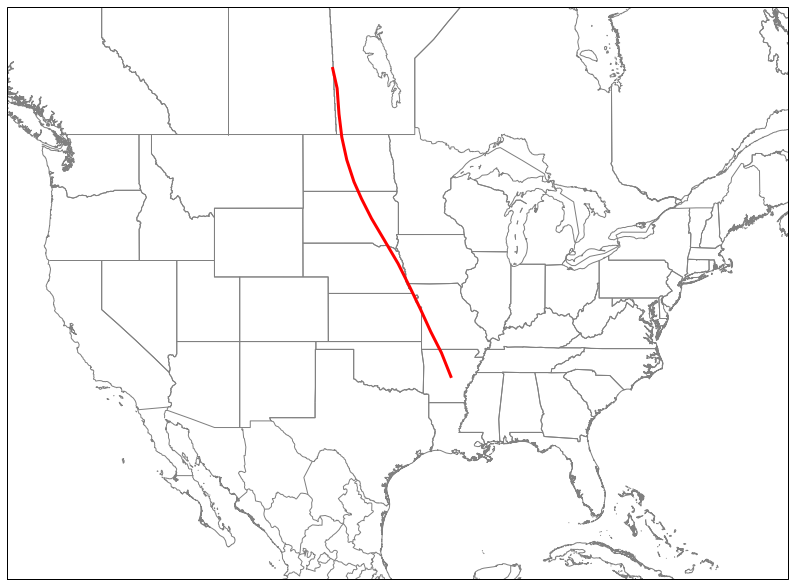

In [16]:
plt.figure(figsize=(14, 14))

def plot_traj(traj, m):
    pts = np.array([(pt[0], pt[1]) for pt in traj.values()])
    m.plot.lines(pts, color='red', lw=3)
    
m = CartopyMap(bbox=conus)
m.draw()
plot_traj(traj_lr, m)